In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# EDA

In [6]:
df.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

check for duplicates

In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(781, 8)

No duplicates are present

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  781 non-null    int64  
 1   Pclass    781 non-null    int64  
 2   Sex       781 non-null    object 
 3   Age       676 non-null    float64
 4   SibSp     781 non-null    int64  
 5   Parch     781 non-null    int64  
 6   Fare      781 non-null    float64
 7   Cabin     203 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.9+ KB


**Check for null values**

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         105
SibSp         0
Parch         0
Fare          0
Cabin       578
dtype: int64

There are some null values present

In [11]:
df['Age'].replace("NaN",df['Age'].mean(),inplace=True)

In [12]:
df.drop(["Cabin"],axis=1,inplace=True)

The feature column is dropped as its least effected

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

All the null values has been cleared

**Separate the categorical and numerical columns**

In [15]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

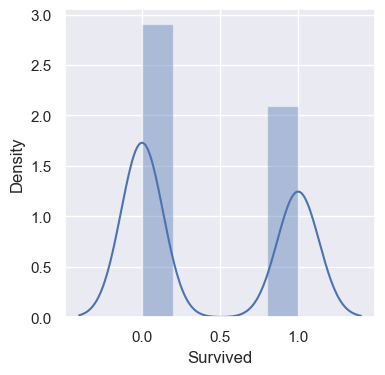

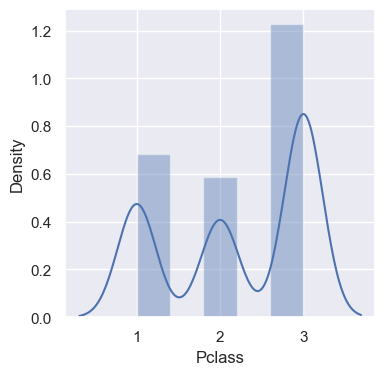

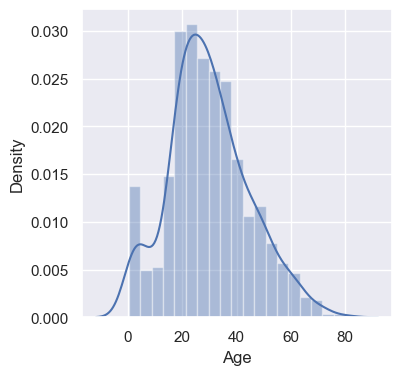

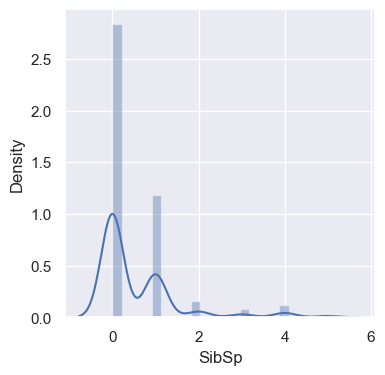

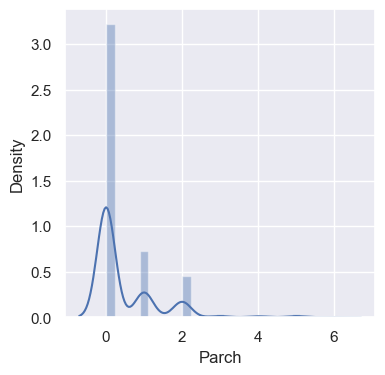

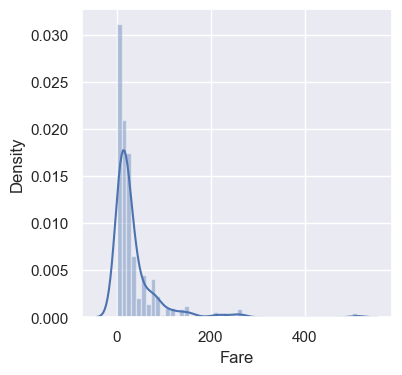

In [16]:
for i in numerical_cols:
    sns.set()#gives grids in background
    plt.figure(figsize=(4,4))
    sns.distplot(df[i])
    plt.show()

From the above distplot we can see that there is skewness in the columns

**Outliers**

So we will do capping for these outliers

Survived       Axes(0.125,0.712609;0.227941x0.167391)
Pclass      Axes(0.398529,0.712609;0.227941x0.167391)
Age         Axes(0.672059,0.712609;0.227941x0.167391)
SibSp          Axes(0.125,0.511739;0.227941x0.167391)
Parch       Axes(0.398529,0.511739;0.227941x0.167391)
Fare        Axes(0.672059,0.511739;0.227941x0.167391)
dtype: object

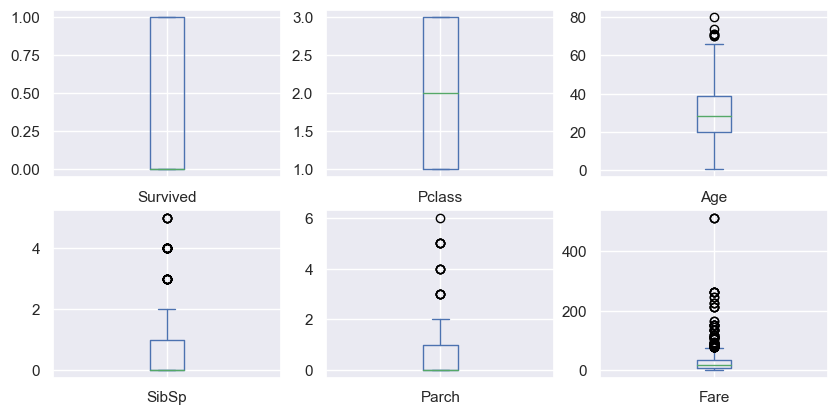

In [17]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

**Outliers removal**

In [18]:
for i in ['Age','Fare']:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

-8.5
67.5
-33.125
76.675


Survived       Axes(0.125,0.712609;0.227941x0.167391)
Pclass      Axes(0.398529,0.712609;0.227941x0.167391)
Age         Axes(0.672059,0.712609;0.227941x0.167391)
SibSp          Axes(0.125,0.511739;0.227941x0.167391)
Parch       Axes(0.398529,0.511739;0.227941x0.167391)
Fare        Axes(0.672059,0.511739;0.227941x0.167391)
dtype: object

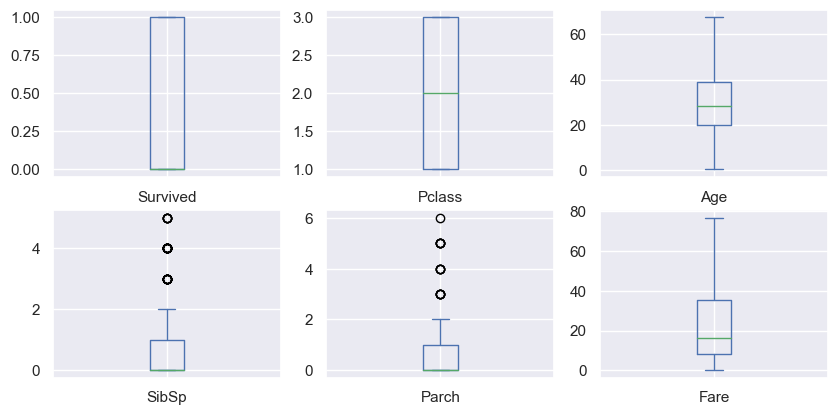

In [19]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

The sibSP and Parch outliers should not be removed

**Encoding technique**

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
883,0,2,1,28.0,0,0,10.5000
885,0,3,0,39.0,0,5,29.1250
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


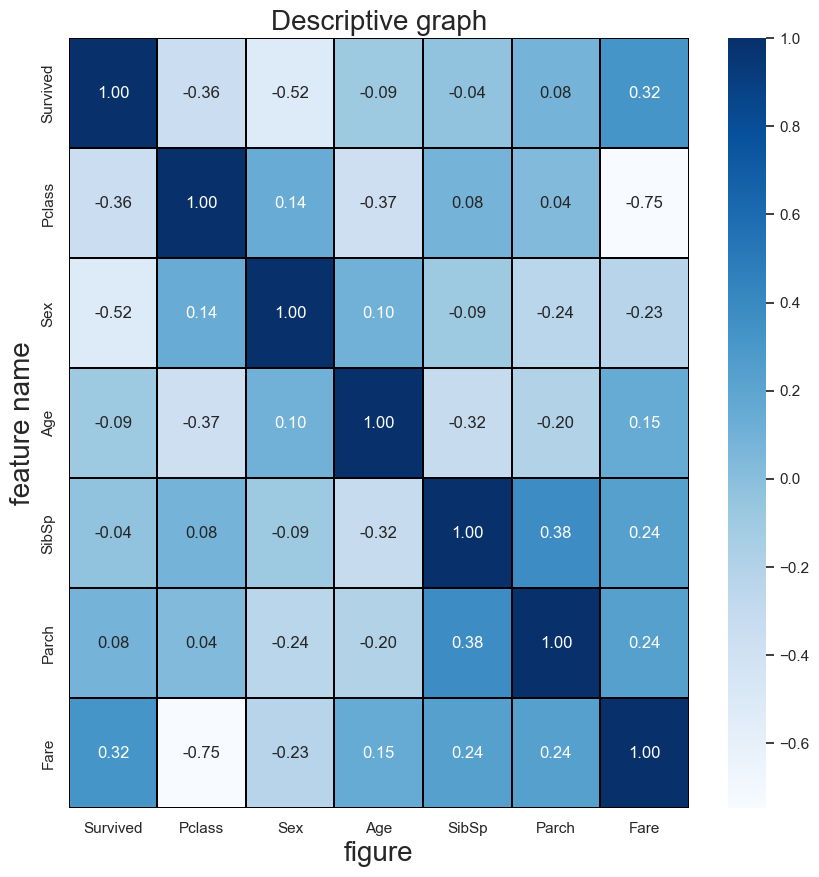

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

There is no much correlation between the feature so its okay

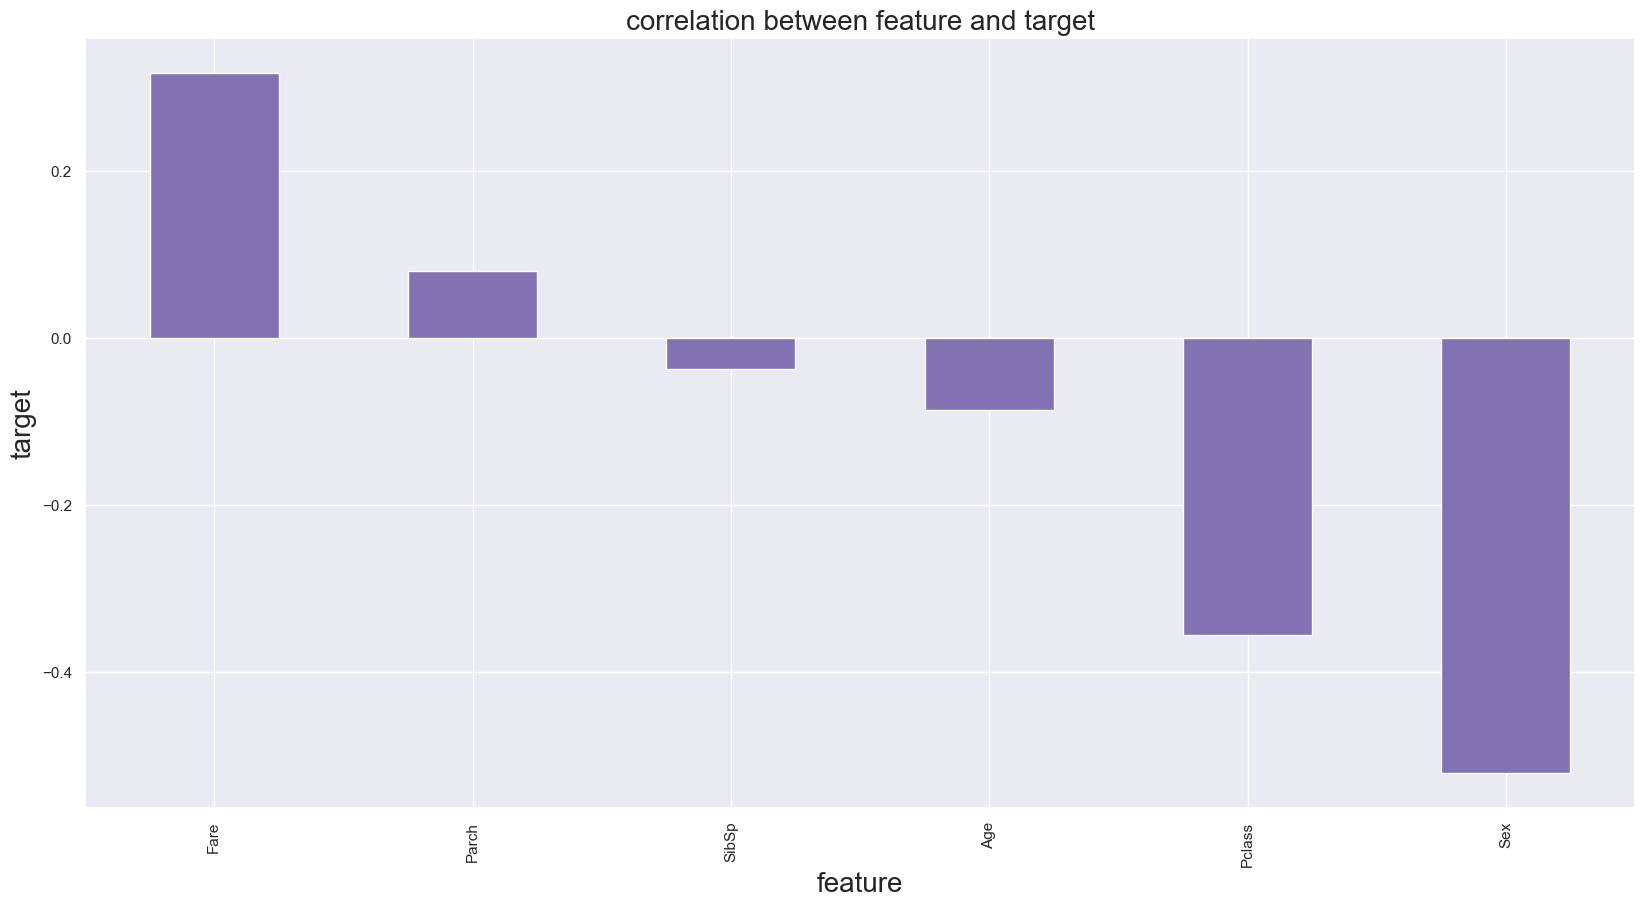

In [24]:
plt.figure(figsize=(20,10))
df.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=20)
plt.ylabel('target',fontsize=20)
plt.title('correlation between feature and target',fontsize=20)
plt.show()

In [25]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features=correlation(df,0.8)

In [27]:
corr_features

set()

ALL CLEAR

**Check if there is any inbalance in data**

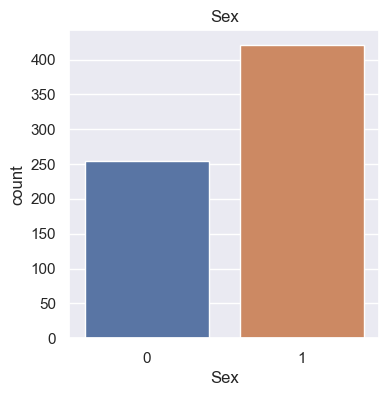

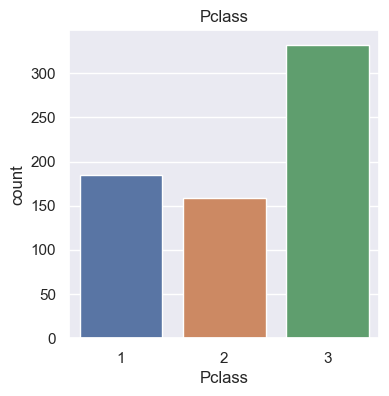

In [28]:
for i in ['Sex','Pclass']:
    plt.figure(figsize=(4,4))
    sns.countplot(x=i,data=df)
    plt.title(i)
    plt.show()

There is no imbalance in the data so there is no need of balancing

In [29]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

**Scaling of the parameters**

In [30]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.92383885,  0.77826776, -0.53510687,  0.49134287, -0.52204619,
        -0.84779472],
       [-1.4372767 , -1.28490482,  0.55889245,  0.49134287, -0.52204619,
         1.8251843 ],
       [ 0.92383885, -1.28490482, -0.26160704, -0.5664526 , -0.52204619,
        -0.8196178 ],
       ...,
       [-1.4372767 , -1.28490482, -0.74023174, -0.5664526 , -0.52204619,
         0.10187167],
       [-1.4372767 ,  0.77826776, -0.26160704, -0.5664526 , -0.52204619,
         0.10187167],
       [ 0.92383885,  0.77826776,  0.14864271, -0.5664526 , -0.52204619,
        -0.82692293]])

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

**Finding best random state for building our classification models**

In [32]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.893491124260355
random state  724


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=724)

In [34]:
print("size of x_train : ",x_train.shape)
print("size of x_test : ",x_test.shape)
print("size of y_train : ",y_train.shape)
print("size of y_test : ",y_test.shape)

size of x_train :  (507, 6)
size of x_test :  (169, 6)
size of y_train :  (507,)
size of y_test :  (169,)


**Checking which model gives better results**

In [35]:
def classify(clf,X,y):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=724)
        
        #train the model
        clf.fit(x_train,y_train)
        
        #predicting Ytest
        pred=clf.predict(x_test)
        
        #accuracy score
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score",acc_score)
        
        #confusion matrix
        print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
        #classification report
        print("Classification report :\n",classification_report(y_test,pred))
        
        #cross validation score
        cv_score=(cross_val_score(clf,x,y,cv=5).mean())
        print("cross validation score ",cv_score)
        
        #Result of accuracy minus cv scores
        result=acc_score-cv_score
        print("The final result of accuracy minus cross validation is ",result)

In [36]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy score 0.893491124260355
Confusion matrix :
 [[94 11]
 [ 7 57]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       105
           1       0.84      0.89      0.86        64

    accuracy                           0.89       169
   macro avg       0.88      0.89      0.89       169
weighted avg       0.90      0.89      0.89       169

cross validation score  0.7781808278867102
The final result of accuracy minus cross validation is  0.11531029637364487


DesicionTreeClassifier

In [37]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy score 0.7988165680473372
Confusion matrix :
 [[84 21]
 [13 51]]
Classification report :
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       105
           1       0.71      0.80      0.75        64

    accuracy                           0.80       169
   macro avg       0.79      0.80      0.79       169
weighted avg       0.81      0.80      0.80       169

cross validation score  0.7441830065359477
The final result of accuracy minus cross validation is  0.05463356151138954


In [38]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy score 0.8402366863905325
Confusion matrix :
 [[91 14]
 [13 51]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       105
           1       0.78      0.80      0.79        64

    accuracy                           0.84       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.84      0.84      0.84       169

cross validation score  0.7930283224400871
The final result of accuracy minus cross validation is  0.047208363950445364


In [39]:
clf=AdaBoostClassifier()
classify(clf,X,y)

Accuracy score 0.8284023668639053
Confusion matrix :
 [[86 19]
 [10 54]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       105
           1       0.74      0.84      0.79        64

    accuracy                           0.83       169
   macro avg       0.82      0.83      0.82       169
weighted avg       0.84      0.83      0.83       169

cross validation score  0.7929520697167756
The final result of accuracy minus cross validation is  0.03545029714712977


In [40]:
clf=GradientBoostingClassifier()
classify(clf,X,y)

Accuracy score 0.8698224852071006
Confusion matrix :
 [[96  9]
 [13 51]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       105
           1       0.85      0.80      0.82        64

    accuracy                           0.87       169
   macro avg       0.87      0.86      0.86       169
weighted avg       0.87      0.87      0.87       169

cross validation score  0.8107407407407408
The final result of accuracy minus cross validation is  0.05908174446635983


In [41]:
clf=SVC()
classify(clf,X,y)

Accuracy score 0.8757396449704142
Confusion matrix :
 [[99  6]
 [15 49]]
Classification report :
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       105
           1       0.89      0.77      0.82        64

    accuracy                           0.88       169
   macro avg       0.88      0.85      0.86       169
weighted avg       0.88      0.88      0.87       169

cross validation score  0.662930283224401
The final result of accuracy minus cross validation is  0.21280936174601328


In [42]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy score 0.8461538461538461
Confusion matrix :
 [[89 16]
 [10 54]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       105
           1       0.77      0.84      0.81        64

    accuracy                           0.85       169
   macro avg       0.84      0.85      0.84       169
weighted avg       0.85      0.85      0.85       169

cross validation score  0.6850217864923748
The final result of accuracy minus cross validation is  0.16113205966147137


In [50]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc_score=accuracy_score(y_test,pred)
print("Accuracy score",acc_score)
#confusion matrix
print("Confusion matrix :\n",confusion_matrix(y_test,pred))
#classification report
print("Classification report :\n",classification_report(y_test,pred))
        

Accuracy score 0.8402366863905325
Confusion matrix :
 [[91 14]
 [13 51]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       105
           1       0.78      0.80      0.79        64

    accuracy                           0.84       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.84      0.84      0.84       169



**Hyper parameter tuning**

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=724)

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [1,10,20],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}
Best Score: 0.8087749951465735
Test Set Score: 0.8461538461538461


In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

**save the model using pickle**

In [54]:
import pickle

In [55]:
filename='titanic.pkl'
pickle.dump(rf,open(filename,'wb'))


In [56]:
loaded_model=pickle.load(open('titanic.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

84.02366863905326


In [57]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
Predicted,0,0,0,1,0,1,1,0,0,1,...,1,0,0,0,0,0,1,0,1,1
Original,0,0,0,1,0,1,1,0,0,1,...,1,0,0,0,0,0,1,0,1,1
